<div style="border:solid gray 2px; padding: 30px">
    
Визуализация количества выигранных медалей по велосоревнованиям "UCI World Championships" за 2023 год. Данные взяты с сайта https://www.cyclingnews.com/ с помощью технологии парсинга.

#### **1. Загрузка библиотек**

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

#### 2. Общий запрос с поиском всех страниц на странице сайте

* спарсить таблицы с сайта через запрос 'requests'

In [2]:
page = requests.get("https://www.cyclingnews.com/features/uci-world-championships-medal-table/").text
df_page = pd.read_html(page)

* всего найдено таблиц на странице

In [3]:
len(df_page)

12

* вывод первой таблицы со страницы сайта

In [4]:
df_medal = df_page[0]
df_medal.head(10)

,Pos.,Country,Gold,Silver,Bronze,Total
0,1,Great Britain,23,12,21,56
1,2,Germany,14,12,6,32
2,3,France,13,19,10,42
3,4,United States of America,11,6,6,23
4,5,Belgium,8,5,8,21
5,6,Netherlands,7,6,3,16
6,7,Switzerland,6,5,5,16
7,8,New Zealand,6,4,9,19
8,9,Spain,3,6,4,13
9,10,Norway,3,3,1,7


In [5]:
df_medal = df_medal.replace('United States of America', 'USA')

* гистограмма для первых 7 стран с количеством выигранных медалей

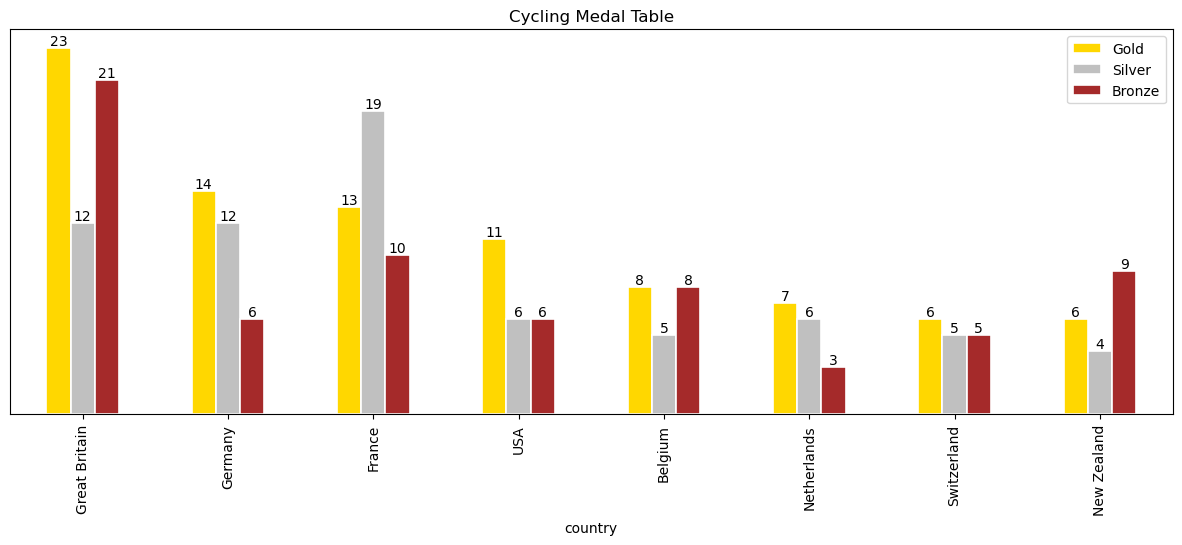

In [6]:
country = df_medal['Country'][:8]

ax = df_medal[['Gold', 'Silver', 'Bronze']][:8].plot(kind='bar',figsize=(15,5), grid=False, 
                                                     color=['gold', 'silver', 'brown'], edgecolor='white',
                                                     linewidth=1.2)

for container in ax.containers:
    ax.bar_label(container)
    
ax.set_xlabel('country')  
plt.xticks(np.arange(len(country)), country)
plt.title('Cycling Medal Table')
ax.get_yaxis().set_visible(False) 
plt.show()

#### 3. Запрос с выводом страницы по названию

* спарсить таблицу с сайта по наименованию

In [7]:
df_track = pd.read_html(page, match = 'Track World Championships Medals')
df_track = df_track[0]
df_track.head(10)

,Nation,Gold,Silver,Bronze,Total
0,Great Britain,5,3,1,9
1,Netherlands,4,1,0,5
2,United States,3,0,1,4
3,Germany,2,2,2,6
4,New Zealand,2,1,5,8
5,Belgium,2,0,3,5
6,Italy,1,1,2,4
7,Denmark,1,1,0,2
8,Colombia,1,1,0,2
9,Portugal,1,0,0,1


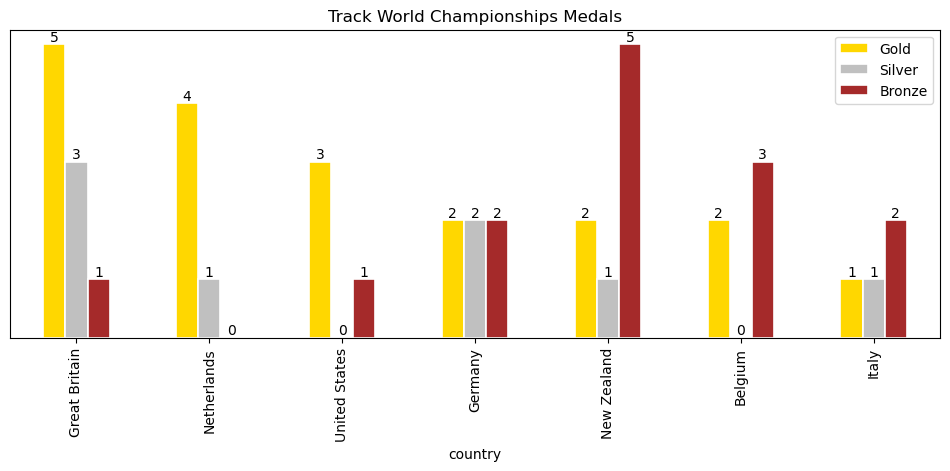

In [8]:
nation = df_track['Nation'][:7]

ax = df_track[['Gold', 'Silver', 'Bronze']][:7].plot(kind='bar',figsize=(12,4), grid=False, 
                                                     color=['gold', 'silver', 'brown'], edgecolor='white',
                                                     linewidth=1.2)

for container in ax.containers:
    ax.bar_label(container)
    
ax.set_xlabel('country')  
plt.xticks(np.arange(len(nation)), nation)
plt.title('Track World Championships Medals')
ax.get_yaxis().set_visible(False) 
plt.show()